In [1]:
from util import *
from glob import glob

In [2]:
df = load_AOIs()
df

,Taranaki,AOI,SSP 4.5 (p50),SSP 4.5 (p83),SSP 8.5 (p50),SSP 8.5 (p83),Rate SSP 4.5 (p50),Rate SSP 4.5 (p83),Rate SSP 8.5 (p50),Rate SSP 8.5 (p83),match,match_score
7,NORTH,TongaporutuRiver,0.57,0.78,0.84,1.10,0.0057,0.0078,0.0084,0.0110,TongapurutuRiverCliffs,93.750000
11,SOUTH,HangatahuaRiver_South,0.57,0.78,0.84,1.10,0.0057,0.0078,0.0084,0.0110,HangatahuRiver_South,97.435897
21,SOUTH,Rahotu,0.58,0.78,0.84,1.10,0.0058,0.0078,0.0084,0.0110,Rahotu,100.000000
20,SOUTH,Pihama,0.57,0.78,0.84,1.10,0.0057,0.0078,0.0084,0.0110,Pihama,100.000000
19,SOUTH,OpunakeBeach,0.57,0.78,0.84,1.10,0.0057,0.0078,0.0084,0.0110,OpunakeBeachCliffs,100.000000
18,SOUTH,OhaweBeach,0.57,0.78,0.83,1.10,0.0057,0.0078,0.0083,0.0110,OhaweBeach,100.000000
17,SOUTH,Oeo,0.57,0.78,0.84,1.10,0.0057,0.0078,0.0084,0.0110,Oeo,100.000000
16,SOUTH,Manutahi,0.57,0.78,0.83,1.10,0.0057,0.0078,0.0083,0.0110,Manutahi,100.000000
15,SOUTH,ManaBay,0.57,0.78,0.83,1.10,0.0057,0.0078,0.0083,0.0110,ManaBayCliffs,100.000000
14,SOUTH,KaupokonuiBeach,0.57,0.78,0.84,1.10,0.0057,0.0078,0.0084,0.0110,KaupokonuiBeach,100.000000


In [3]:
site = df.match.sample(1).iloc[0]
site

'Rahotu'

In [4]:
gdf = gpd.read_file(f"Shapefiles/{site}_intersects.shp")
gdf.crs = 2193
gdf = enrich_df(gdf)
transect_metadata = get_transect_metadata(f"Shapefiles/{site}_TransectLines.shp")
if site == "ManaBayCliffs":
  print("Flipping")
  for k, v in transect_metadata.items():
    transect_metadata[k]["Azimuth"] = v["Azimuth"] + 180

In [5]:
linear_models = fit(gdf, transect_metadata)
linear_models.loc[linear_models.slope > 0, "slope"] = pd.NA
rolled_slopes = linear_models.groupby("group").slope.rolling(10, min_periods=1).mean().dropna().reset_index(level=0)
linear_models.slope = rolled_slopes.slope
linear_models.dropna(inplace=True)
linear_models.index = linear_models.TransectID
linear_models

,TransectID,slope,intercept,group,r2_score
TransectID,,,,,
2,2,-0.067516,23.972820,0,0.869492
3,3,-0.092041,30.485220,0,0.587300
4,4,-0.106825,31.239290,0,0.884705
5,5,-0.103393,33.344049,0,1.000000
6,6,-0.085842,27.082905,0,0.101820
...,...,...,...,...,...
1014,1014,-0.015854,29.148976,8,0.001035
1015,1015,-0.015604,30.658558,8,0.008908
1016,1016,-0.017870,32.711681,8,0.097979


In [6]:
linear_models.describe()

,TransectID,slope,intercept,group,r2_score
count,908.000000,908.000000,908.000000,908.000000,9.080000e+02
mean,526.428414,-0.220852,51.789281,4.733480,6.687052e-01
std,301.003325,0.150900,16.685613,2.800516,3.529338e-01
min,2.000000,-0.725019,13.401207,0.000000,6.688662e-07
25%,251.750000,-0.339210,38.842101,2.000000,3.401185e-01
50%,556.500000,-0.184264,50.208741,6.000000,8.568375e-01
75%,786.250000,-0.101641,64.387672,7.000000,9.598653e-01
max,1018.000000,-0.002975,112.217880,8.000000,1.000000e+00


In [7]:
# Find the closest data point to 2000
gdf["years_since_2000"] = (gdf.Year - 2000).abs()
closest_to_2000 = gdf.loc[gdf.groupby("TransectID").years_since_2000.idxmin()]
closest_to_2000.set_index("TransectID", inplace=True)
closest_to_2000

,OBJECTID,TransOrder,BaselineID,ShorelineI,Distance,IntersectX,IntersectY,Uncertaint,AOI,geometry,Date,Year,YearsSinceBase,YearsUntilFuture,years_since_2000
TransectID,,,,,,,,,,,,,,,
2,2,2,1,11/02/2017,18.010096,1.665142e+06,5.649315e+06,2.12953,Rahotu,POINT (1665141.600 5649315.338),2017-02-11,2017,77.114305,82.885695,17
3,5,3,1,11/02/2017,18.671306,1.665136e+06,5.649304e+06,2.12953,Rahotu,POINT (1665136.414 5649303.884),2017-02-11,2017,77.114305,82.885695,17
4,8,4,1,11/02/2017,19.297877,1.665132e+06,5.649292e+06,2.12953,Rahotu,POINT (1665131.559 5649291.748),2017-02-11,2017,77.114305,82.885695,17
5,11,5,1,11/02/2017,26.166346,1.665129e+06,5.649274e+06,2.12953,Rahotu,POINT (1665128.859 5649273.583),2017-02-11,2017,77.114305,82.885695,17
6,15,6,1,11/02/2017,25.187120,1.665137e+06,5.649256e+06,2.12953,Rahotu,POINT (1665137.307 5649256.204),2017-02-11,2017,77.114305,82.885695,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,3830,1014,1,11/02/2017,29.795849,1.667300e+06,5.639744e+06,2.12953,Rahotu,POINT (1667300.057 5639744.235),2017-02-11,2017,77.114305,82.885695,17
1015,3834,1015,1,11/02/2017,30.420989,1.667303e+06,5.639735e+06,2.12953,Rahotu,POINT (1667302.742 5639734.582),2017-02-11,2017,77.114305,82.885695,17
1016,3838,1016,1,11/02/2017,31.347719,1.667305e+06,5.639725e+06,2.12953,Rahotu,POINT (1667305.141 5639724.830),2017-02-11,2017,77.114305,82.885695,17


In [8]:
closest_to_2000.Year.value_counts()

2017    953
2020     39
1970      8
Name: Year, dtype: int64

In [9]:
# Predict to the closest year to 2000
linear_models["FUTURE_YEAR"] = closest_to_2000.Year
linear_models

,TransectID,slope,intercept,group,r2_score,FUTURE_YEAR
TransectID,,,,,,
2,2,-0.067516,23.972820,0,0.869492,2017
3,3,-0.092041,30.485220,0,0.587300,2017
4,4,-0.106825,31.239290,0,0.884705,2017
5,5,-0.103393,33.344049,0,1.000000,2017
6,6,-0.085842,27.082905,0,0.101820,2017
...,...,...,...,...,...,...
1014,1014,-0.015854,29.148976,8,0.001035,2017
1015,1015,-0.015604,30.658558,8,0.008908,2017
1016,1016,-0.017870,32.711681,8,0.097979,2017


In [10]:
results = predict(gdf, linear_models, transect_metadata)
results

,TransectID,BaselineID,group,Year,ocean_point,linear_model_point,linear_model_distance,sqrt_model_point,sqrt_model_distance,BH_model_point,BH_model_distance,Sunamura_model_point,Sunamura_model_distance
0,2.0,1,0.0,2017,POINT (1664664.8245704086 5649469.883464659),POINT (1665140.872887912 5649315.57333763),0.433428,POINT (1665146.9857917696 5649313.591851853),6.859459,POINT (1665157.1386520474 5649310.300822137),17.532390,POINT (1665145.8921723475 5649313.94634644),5.709820
1,3.0,1,0.0,2017,POINT (1664639.3268896674 5649392.87629466),POINT (1665131.761222278 5649304.716946108),0.263573,POINT (1665140.3843462446 5649303.173168713),9.023797,POINT (1665148.5925816 5649301.70366784),17.362535,POINT (1665136.9534851408 5649303.787387625),5.538388
2,4.0,1,0.0,2017,POINT (1664629.4217438332 5649300.776302729),POINT (1665129.340953854 5649291.788341204),0.000000,POINT (1665138.009463865 5649291.632491552),8.669911,POINT (1665144.9399704037 5649291.507889167),15.601537,POINT (1665133.116783081 5649291.720456219),3.776439
3,5.0,1,0.0,2017,POINT (1664654.8984438553 5649115.4579769885),POINT (1665129.6027029734 5649273.831299159),0.426061,POINT (1665138.937531738 5649276.945633641),10.266697,POINT (1665145.822781684 5649279.242726805),17.525023,POINT (1665134.6057008351 5649275.5004255185),5.700146
4,6.0,1,0.0,2017,POINT (1664752.4593164793 5648935.788133551),POINT (1665140.930096687 5649259.220119612),5.487682,POINT (1665147.2089802206 5649264.447776041),13.657919,POINT (1665154.0707672853 5649270.160744767),22.586644,POINT (1665144.9841348662 5649262.595420115),10.762896
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1014.0,1,8.0,2017,POINT (1666830.994640222 5639581.624518254),POINT (1667303.4119572202 5639745.39838247),0.000000,POINT (1667303.4119572202 5639745.39838247),0.000000,POINT (1667317.9772186545 5639750.447751031),15.415673,POINT (1667306.80998502 5639746.576383621),3.596426
904,1015.0,1,8.0,2017,POINT (1666833.4683770866 5639571.898302844),POINT (1667305.8856940847 5639735.67216706),0.000000,POINT (1667305.8856940847 5639735.67216706),0.000000,POINT (1667319.8081121151 5639740.498679802),14.735296,POINT (1667308.6408936945 5639736.627317666),2.916065
905,1016.0,1,8.0,2017,POINT (1666836.1801914156 5639562.25446811),POINT (1667308.5975084137 5639726.028332327),0.000000,POINT (1667308.5975084137 5639726.028332327),0.000000,POINT (1667321.3085896496 5639730.434908499),13.453234,POINT (1667310.1412334987 5639726.563498615),1.633857
906,1017.0,1,8.0,2017,POINT (1666837.246540962 5639552.040278923),POINT (1667309.6638579601 5639715.814143139),0.000000,POINT (1667310.2107052535 5639716.003719794),0.578776,POINT (1667324.5866661572 5639720.987463158),15.794095,POINT (1667313.4191932932 5639717.1160128135),3.974595


In [11]:
results.index = results.TransectID.astype(int)
results

,TransectID,BaselineID,group,Year,ocean_point,linear_model_point,linear_model_distance,sqrt_model_point,sqrt_model_distance,BH_model_point,BH_model_distance,Sunamura_model_point,Sunamura_model_distance
TransectID,,,,,,,,,,,,,
2,2.0,1,0.0,2017,POINT (1664664.8245704086 5649469.883464659),POINT (1665140.872887912 5649315.57333763),0.433428,POINT (1665146.9857917696 5649313.591851853),6.859459,POINT (1665157.1386520474 5649310.300822137),17.532390,POINT (1665145.8921723475 5649313.94634644),5.709820
3,3.0,1,0.0,2017,POINT (1664639.3268896674 5649392.87629466),POINT (1665131.761222278 5649304.716946108),0.263573,POINT (1665140.3843462446 5649303.173168713),9.023797,POINT (1665148.5925816 5649301.70366784),17.362535,POINT (1665136.9534851408 5649303.787387625),5.538388
4,4.0,1,0.0,2017,POINT (1664629.4217438332 5649300.776302729),POINT (1665129.340953854 5649291.788341204),0.000000,POINT (1665138.009463865 5649291.632491552),8.669911,POINT (1665144.9399704037 5649291.507889167),15.601537,POINT (1665133.116783081 5649291.720456219),3.776439
5,5.0,1,0.0,2017,POINT (1664654.8984438553 5649115.4579769885),POINT (1665129.6027029734 5649273.831299159),0.426061,POINT (1665138.937531738 5649276.945633641),10.266697,POINT (1665145.822781684 5649279.242726805),17.525023,POINT (1665134.6057008351 5649275.5004255185),5.700146
6,6.0,1,0.0,2017,POINT (1664752.4593164793 5648935.788133551),POINT (1665140.930096687 5649259.220119612),5.487682,POINT (1665147.2089802206 5649264.447776041),13.657919,POINT (1665154.0707672853 5649270.160744767),22.586644,POINT (1665144.9841348662 5649262.595420115),10.762896
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,1014.0,1,8.0,2017,POINT (1666830.994640222 5639581.624518254),POINT (1667303.4119572202 5639745.39838247),0.000000,POINT (1667303.4119572202 5639745.39838247),0.000000,POINT (1667317.9772186545 5639750.447751031),15.415673,POINT (1667306.80998502 5639746.576383621),3.596426
1015,1015.0,1,8.0,2017,POINT (1666833.4683770866 5639571.898302844),POINT (1667305.8856940847 5639735.67216706),0.000000,POINT (1667305.8856940847 5639735.67216706),0.000000,POINT (1667319.8081121151 5639740.498679802),14.735296,POINT (1667308.6408936945 5639736.627317666),2.916065
1016,1016.0,1,8.0,2017,POINT (1666836.1801914156 5639562.25446811),POINT (1667308.5975084137 5639726.028332327),0.000000,POINT (1667308.5975084137 5639726.028332327),0.000000,POINT (1667321.3085896496 5639730.434908499),13.453234,POINT (1667310.1412334987 5639726.563498615),1.633857


In [12]:
results["True"] = closest_to_2000.geometry
results

,TransectID,BaselineID,group,Year,ocean_point,linear_model_point,linear_model_distance,sqrt_model_point,sqrt_model_distance,BH_model_point,BH_model_distance,Sunamura_model_point,Sunamura_model_distance,True
TransectID,,,,,,,,,,,,,,
2,2.0,1,0.0,2017,POINT (1664664.8245704086 5649469.883464659),POINT (1665140.872887912 5649315.57333763),0.433428,POINT (1665146.9857917696 5649313.591851853),6.859459,POINT (1665157.1386520474 5649310.300822137),17.532390,POINT (1665145.8921723475 5649313.94634644),5.709820,POINT (1665141.600 5649315.338)
3,3.0,1,0.0,2017,POINT (1664639.3268896674 5649392.87629466),POINT (1665131.761222278 5649304.716946108),0.263573,POINT (1665140.3843462446 5649303.173168713),9.023797,POINT (1665148.5925816 5649301.70366784),17.362535,POINT (1665136.9534851408 5649303.787387625),5.538388,POINT (1665136.414 5649303.884)
4,4.0,1,0.0,2017,POINT (1664629.4217438332 5649300.776302729),POINT (1665129.340953854 5649291.788341204),0.000000,POINT (1665138.009463865 5649291.632491552),8.669911,POINT (1665144.9399704037 5649291.507889167),15.601537,POINT (1665133.116783081 5649291.720456219),3.776439,POINT (1665131.559 5649291.748)
5,5.0,1,0.0,2017,POINT (1664654.8984438553 5649115.4579769885),POINT (1665129.6027029734 5649273.831299159),0.426061,POINT (1665138.937531738 5649276.945633641),10.266697,POINT (1665145.822781684 5649279.242726805),17.525023,POINT (1665134.6057008351 5649275.5004255185),5.700146,POINT (1665128.859 5649273.583)
6,6.0,1,0.0,2017,POINT (1664752.4593164793 5648935.788133551),POINT (1665140.930096687 5649259.220119612),5.487682,POINT (1665147.2089802206 5649264.447776041),13.657919,POINT (1665154.0707672853 5649270.160744767),22.586644,POINT (1665144.9841348662 5649262.595420115),10.762896,POINT (1665137.307 5649256.204)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,1014.0,1,8.0,2017,POINT (1666830.994640222 5639581.624518254),POINT (1667303.4119572202 5639745.39838247),0.000000,POINT (1667303.4119572202 5639745.39838247),0.000000,POINT (1667317.9772186545 5639750.447751031),15.415673,POINT (1667306.80998502 5639746.576383621),3.596426,POINT (1667300.057 5639744.235)
1015,1015.0,1,8.0,2017,POINT (1666833.4683770866 5639571.898302844),POINT (1667305.8856940847 5639735.67216706),0.000000,POINT (1667305.8856940847 5639735.67216706),0.000000,POINT (1667319.8081121151 5639740.498679802),14.735296,POINT (1667308.6408936945 5639736.627317666),2.916065,POINT (1667302.742 5639734.582)
1016,1016.0,1,8.0,2017,POINT (1666836.1801914156 5639562.25446811),POINT (1667308.5975084137 5639726.028332327),0.000000,POINT (1667308.5975084137 5639726.028332327),0.000000,POINT (1667321.3085896496 5639730.434908499),13.453234,POINT (1667310.1412334987 5639726.563498615),1.633857,POINT (1667305.141 5639724.830)


In [13]:
m = closest_to_2000.explore(color="green", tiles="Esri.WorldImagery")
for model in SUPPORTED_MODELS:
  gpd.GeoDataFrame(results[f"{model}_model_distance"], geometry=results[f"{model}_model_point"], crs=2193).explore(color="blue", m=m)
m

In [14]:
results

,TransectID,BaselineID,group,Year,ocean_point,linear_model_point,linear_model_distance,sqrt_model_point,sqrt_model_distance,BH_model_point,BH_model_distance,Sunamura_model_point,Sunamura_model_distance,True
TransectID,,,,,,,,,,,,,,
2,2.0,1,0.0,2017,POINT (1664664.8245704086 5649469.883464659),POINT (1665140.872887912 5649315.57333763),0.433428,POINT (1665146.9857917696 5649313.591851853),6.859459,POINT (1665157.1386520474 5649310.300822137),17.532390,POINT (1665145.8921723475 5649313.94634644),5.709820,POINT (1665141.600 5649315.338)
3,3.0,1,0.0,2017,POINT (1664639.3268896674 5649392.87629466),POINT (1665131.761222278 5649304.716946108),0.263573,POINT (1665140.3843462446 5649303.173168713),9.023797,POINT (1665148.5925816 5649301.70366784),17.362535,POINT (1665136.9534851408 5649303.787387625),5.538388,POINT (1665136.414 5649303.884)
4,4.0,1,0.0,2017,POINT (1664629.4217438332 5649300.776302729),POINT (1665129.340953854 5649291.788341204),0.000000,POINT (1665138.009463865 5649291.632491552),8.669911,POINT (1665144.9399704037 5649291.507889167),15.601537,POINT (1665133.116783081 5649291.720456219),3.776439,POINT (1665131.559 5649291.748)
5,5.0,1,0.0,2017,POINT (1664654.8984438553 5649115.4579769885),POINT (1665129.6027029734 5649273.831299159),0.426061,POINT (1665138.937531738 5649276.945633641),10.266697,POINT (1665145.822781684 5649279.242726805),17.525023,POINT (1665134.6057008351 5649275.5004255185),5.700146,POINT (1665128.859 5649273.583)
6,6.0,1,0.0,2017,POINT (1664752.4593164793 5648935.788133551),POINT (1665140.930096687 5649259.220119612),5.487682,POINT (1665147.2089802206 5649264.447776041),13.657919,POINT (1665154.0707672853 5649270.160744767),22.586644,POINT (1665144.9841348662 5649262.595420115),10.762896,POINT (1665137.307 5649256.204)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,1014.0,1,8.0,2017,POINT (1666830.994640222 5639581.624518254),POINT (1667303.4119572202 5639745.39838247),0.000000,POINT (1667303.4119572202 5639745.39838247),0.000000,POINT (1667317.9772186545 5639750.447751031),15.415673,POINT (1667306.80998502 5639746.576383621),3.596426,POINT (1667300.057 5639744.235)
1015,1015.0,1,8.0,2017,POINT (1666833.4683770866 5639571.898302844),POINT (1667305.8856940847 5639735.67216706),0.000000,POINT (1667305.8856940847 5639735.67216706),0.000000,POINT (1667319.8081121151 5639740.498679802),14.735296,POINT (1667308.6408936945 5639736.627317666),2.916065,POINT (1667302.742 5639734.582)
1016,1016.0,1,8.0,2017,POINT (1666836.1801914156 5639562.25446811),POINT (1667308.5975084137 5639726.028332327),0.000000,POINT (1667308.5975084137 5639726.028332327),0.000000,POINT (1667321.3085896496 5639730.434908499),13.453234,POINT (1667310.1412334987 5639726.563498615),1.633857,POINT (1667305.141 5639724.830)


In [15]:
results[["linear_model_distance", "sqrt_model_distance", "BH_model_distance", "Sunamura_model_distance"]].describe()

,linear_model_distance,sqrt_model_distance,BH_model_distance,Sunamura_model_distance
count,908.000000,908.000000,908.000000,908.000000
mean,4.144994,22.573735,18.555837,7.527806
std,7.959078,16.487184,10.037181,9.148396
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8.780769,12.978125,1.134233
50%,0.000000,21.243435,16.371045,4.536970
75%,4.825553,34.045881,21.973807,10.109852
max,54.931673,87.634326,72.030635,60.194829


In [16]:
for model in SUPPORTED_MODELS:
  print(model)
  print(gpd.GeoSeries(results[f"{model}_model_point"], crs=2193).distance(results["True"]).describe())

linear
count    908.000000
mean       6.562147
std        7.210239
min        0.000000
25%        1.871437
50%        4.036627
75%        8.572486
max       54.328299
dtype: float64
sqrt
count    908.000000
mean      24.635545
std       16.489255
min        0.037164
25%       10.495359
50%       23.562932
75%       35.415738
max       91.150792
dtype: float64
BH
count    908.000000
mean      20.507590
std        9.439540
min        0.000000
25%       15.239711
50%       18.474009
75%       24.531712
max       71.427261
dtype: float64
Sunamura
count    908.000000
mean       9.719667
std        8.332851
min        0.000000
25%        4.281271
50%        7.077995
75%       12.749106
max       59.591454
dtype: float64


In [17]:
results

,TransectID,BaselineID,group,Year,ocean_point,linear_model_point,linear_model_distance,sqrt_model_point,sqrt_model_distance,BH_model_point,BH_model_distance,Sunamura_model_point,Sunamura_model_distance,True
TransectID,,,,,,,,,,,,,,
2,2.0,1,0.0,2017,POINT (1664664.8245704086 5649469.883464659),POINT (1665140.872887912 5649315.57333763),0.433428,POINT (1665146.9857917696 5649313.591851853),6.859459,POINT (1665157.1386520474 5649310.300822137),17.532390,POINT (1665145.8921723475 5649313.94634644),5.709820,POINT (1665141.600 5649315.338)
3,3.0,1,0.0,2017,POINT (1664639.3268896674 5649392.87629466),POINT (1665131.761222278 5649304.716946108),0.263573,POINT (1665140.3843462446 5649303.173168713),9.023797,POINT (1665148.5925816 5649301.70366784),17.362535,POINT (1665136.9534851408 5649303.787387625),5.538388,POINT (1665136.414 5649303.884)
4,4.0,1,0.0,2017,POINT (1664629.4217438332 5649300.776302729),POINT (1665129.340953854 5649291.788341204),0.000000,POINT (1665138.009463865 5649291.632491552),8.669911,POINT (1665144.9399704037 5649291.507889167),15.601537,POINT (1665133.116783081 5649291.720456219),3.776439,POINT (1665131.559 5649291.748)
5,5.0,1,0.0,2017,POINT (1664654.8984438553 5649115.4579769885),POINT (1665129.6027029734 5649273.831299159),0.426061,POINT (1665138.937531738 5649276.945633641),10.266697,POINT (1665145.822781684 5649279.242726805),17.525023,POINT (1665134.6057008351 5649275.5004255185),5.700146,POINT (1665128.859 5649273.583)
6,6.0,1,0.0,2017,POINT (1664752.4593164793 5648935.788133551),POINT (1665140.930096687 5649259.220119612),5.487682,POINT (1665147.2089802206 5649264.447776041),13.657919,POINT (1665154.0707672853 5649270.160744767),22.586644,POINT (1665144.9841348662 5649262.595420115),10.762896,POINT (1665137.307 5649256.204)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,1014.0,1,8.0,2017,POINT (1666830.994640222 5639581.624518254),POINT (1667303.4119572202 5639745.39838247),0.000000,POINT (1667303.4119572202 5639745.39838247),0.000000,POINT (1667317.9772186545 5639750.447751031),15.415673,POINT (1667306.80998502 5639746.576383621),3.596426,POINT (1667300.057 5639744.235)
1015,1015.0,1,8.0,2017,POINT (1666833.4683770866 5639571.898302844),POINT (1667305.8856940847 5639735.67216706),0.000000,POINT (1667305.8856940847 5639735.67216706),0.000000,POINT (1667319.8081121151 5639740.498679802),14.735296,POINT (1667308.6408936945 5639736.627317666),2.916065,POINT (1667302.742 5639734.582)
1016,1016.0,1,8.0,2017,POINT (1666836.1801914156 5639562.25446811),POINT (1667308.5975084137 5639726.028332327),0.000000,POINT (1667308.5975084137 5639726.028332327),0.000000,POINT (1667321.3085896496 5639730.434908499),13.453234,POINT (1667310.1412334987 5639726.563498615),1.633857,POINT (1667305.141 5639724.830)


<AxesSubplot: >

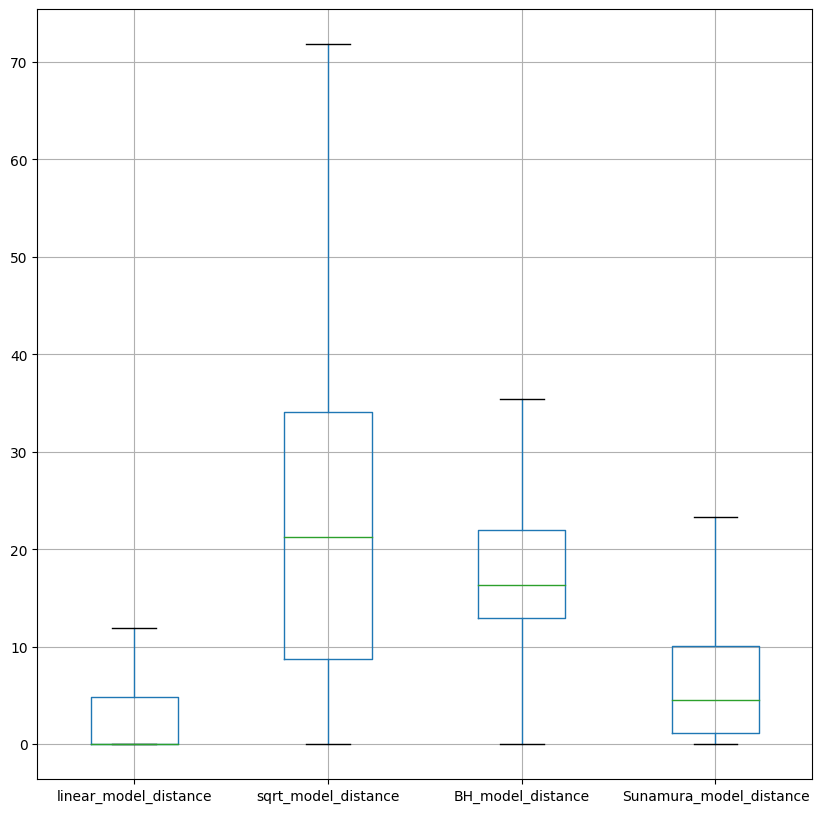

In [18]:
results[["linear_model_distance", "sqrt_model_distance", "BH_model_distance", "Sunamura_model_distance"]].boxplot(figsize=(10,10), showfliers=False)